# Preliminary Analysis of Texture Based Classification of CRC Histology

Notes on the paper introducing the dataset:

*Multi-class texture analysis in colorectal cancer  histology* 

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: (2016), Scientific Reports (in press)

## Motivation/Context

* Colorectal cancer  (CRC) is one of the most prevalent cancer types, on the rise for poorly understood reasons.
* stained histological samples are available for virtually all CRC patients 
* models can be integrated into transparent, easily accessible pipeline to analyze (subpopulation) level dynamics *with reproducible outputs*
    * i.e. "precision medicine"
    

## Previous Work

* tumor architectures changes during progression, related to patient prognosis
    * "quantifying tissue composition in CRC is a relevant task in histopathology"
* previous work:
    * treats this as a binary classification problem of stroma/tumor
    * use own private data set, i.e. results are irreproducible
   
* no benchmark data set for histopathological tissue classification

## Contribution

primary contribution was introducing a very interesting data set, along with a proof-of-concept/benchmarks ML model(s).

1. Made publically available, high quality annotated dataset of CRC tissue slides 
1. Used "texture" feature engineering and "standard" sklearn-type ML to train a model to solve a 8 class classification problem 
    1. Nonuniform accurary of $\sim 80 - 90$ %. Non-uniformity aligned with expectations from subject-area expertise.
    1. AUC of ~97%
1. extended model to a segmentation model for "very large" ($ \sim 10^*8$ pixels) images of tissue



## Data

* 10 H&E stained CRC tissue slides obtained from U. Medical Center Mannheim, Heidelberg University.
        * "standard" staining technique, color intensity scales with concentration of some protein, usually found on outer surface of the cell.
        
* Manually annotated & tessellated (??) with 8 tissue types. In ML in medicine, this is usually the difficult product to obtain
    1. Tumor epithelium
    1. simple stroma (tissues with a nonspecific function)
    1. complex stroma (heterogenous stroma with isolated tumor cells and/or small number of immune cells)
    1. Immune cells
    1. debris (e.g. necrosis, hemoorhage, mucus)
    1. normal mucosal glands
    1. adipose tissue
    1. background

* broken into $5 \times 10^3 = 625 \times 8$ non-overlapping patches
    * each class has equal number of samples.
    * dim = $150 \times 150 \mathrm{px}^2$ = 74 \times 74 \mu\mathrm{m}^2$ ( half $\mu = 10^{-6}\mathrm{m}$ per pixel)
        * "average" cell diameter is around $10 \mu\mathrm{m}$ diameter

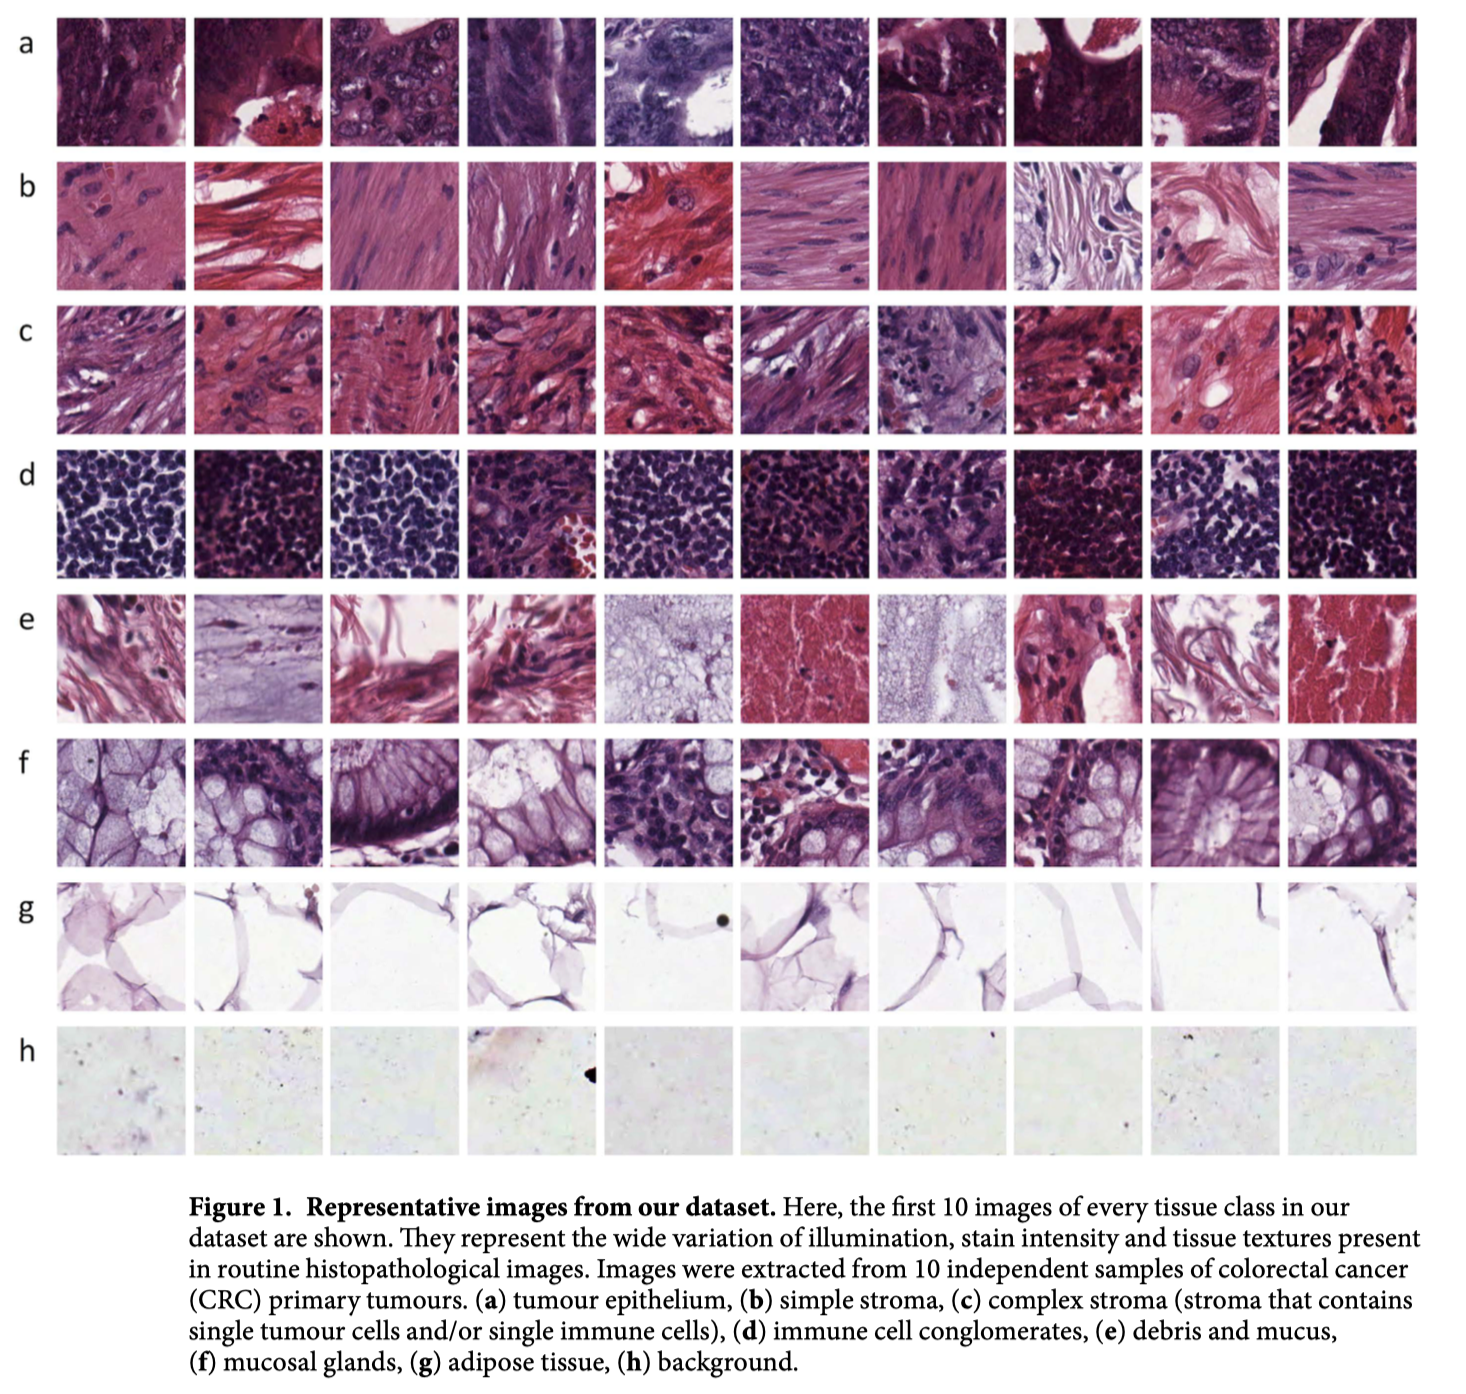

## Things to keep in mind

* staining intensity varies considerably
    * dealt with by making sure "each of the classes listed above contained both bright and dark samples so that no bias in terms of average greyscale intensity was introduced"
* always be think about meaningless features within data

# Their approach: (multi-class) supervised classification problem

Want to think of what they did as a "pipeline". Not exactly what they did, but I'd argue it's what they should have done.


* utilized R and matlab. 
    * This should be reapproached using sklearn's pipelines and randomized cross validated grid search.
* Feature engineered 5 types of "texture features"
    * Probabilistic approach ("lower" and "higher" "histogram" features
        * two sets of (central) moments
        * ~ 5 features for lower
        * ~10 features for higher
    * Signal processing
        * Fourier-type features from rotationally invariant features
        * 38 "local binary patterns" 
        * 6 "Gabor filters" features
    * "grey-level co-occurence matrix"
        * contrast, correlation, etc
        * 20 features
    * "perception like features" 
        * "coarseness, contrast, directionality, line-likeness, roughness"
    * independently  
* Selected 4 models used: 
    * 1 nearest neighbor
    * RUSboosted decision trees
    * linear SVM
    * radial basis function SVM 
* utilized 10 fold cv (argued strat was unneccessary) to rank individual features
* assessed 6 combos by successively adding best features
* extended algoirothim to segmentation task
    * no post-processing of segmentation algorithm

## Results:

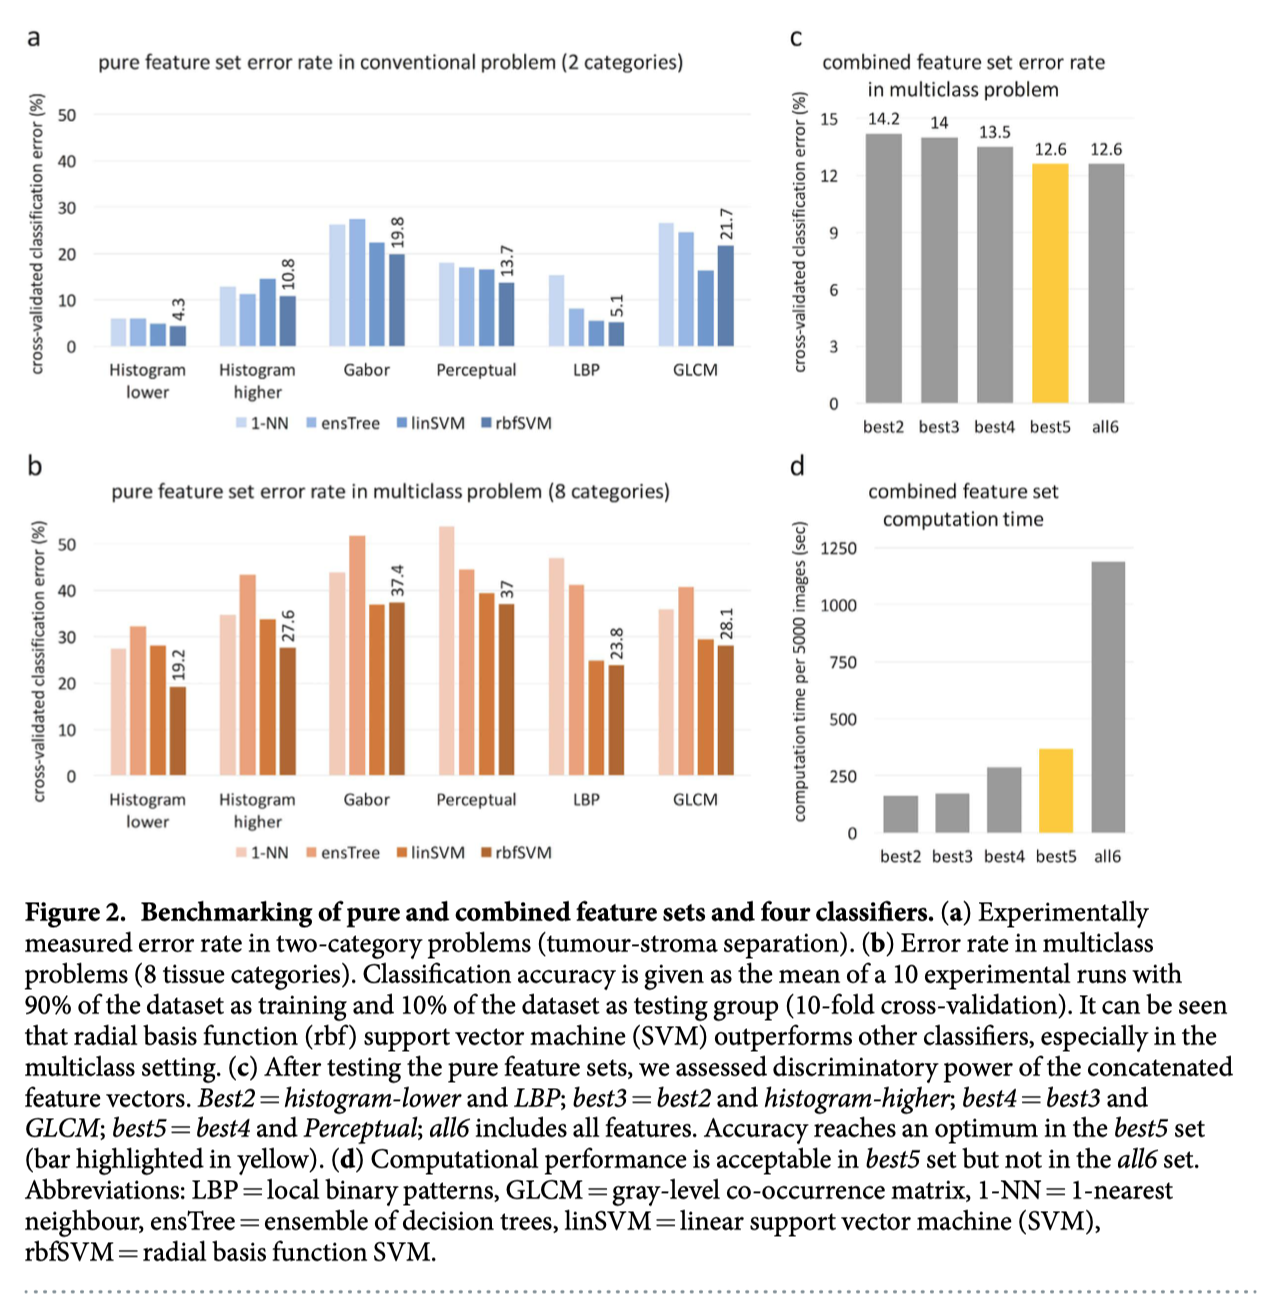
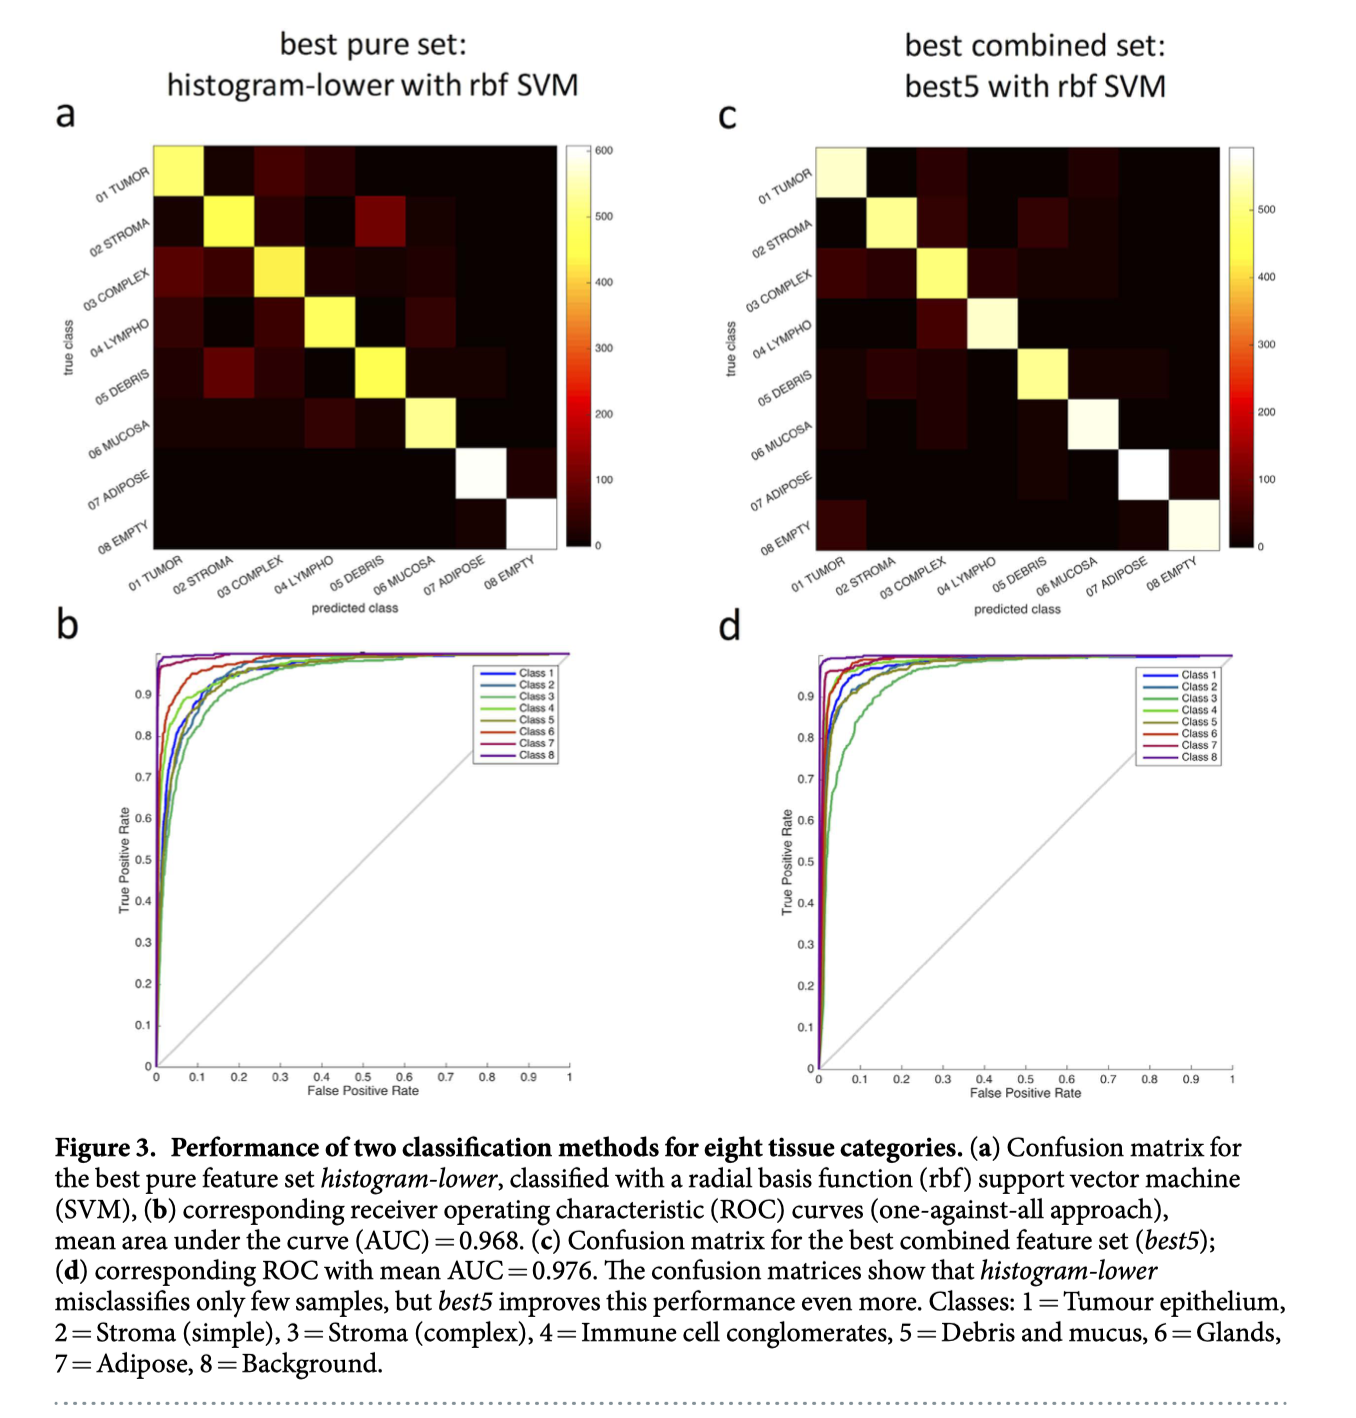

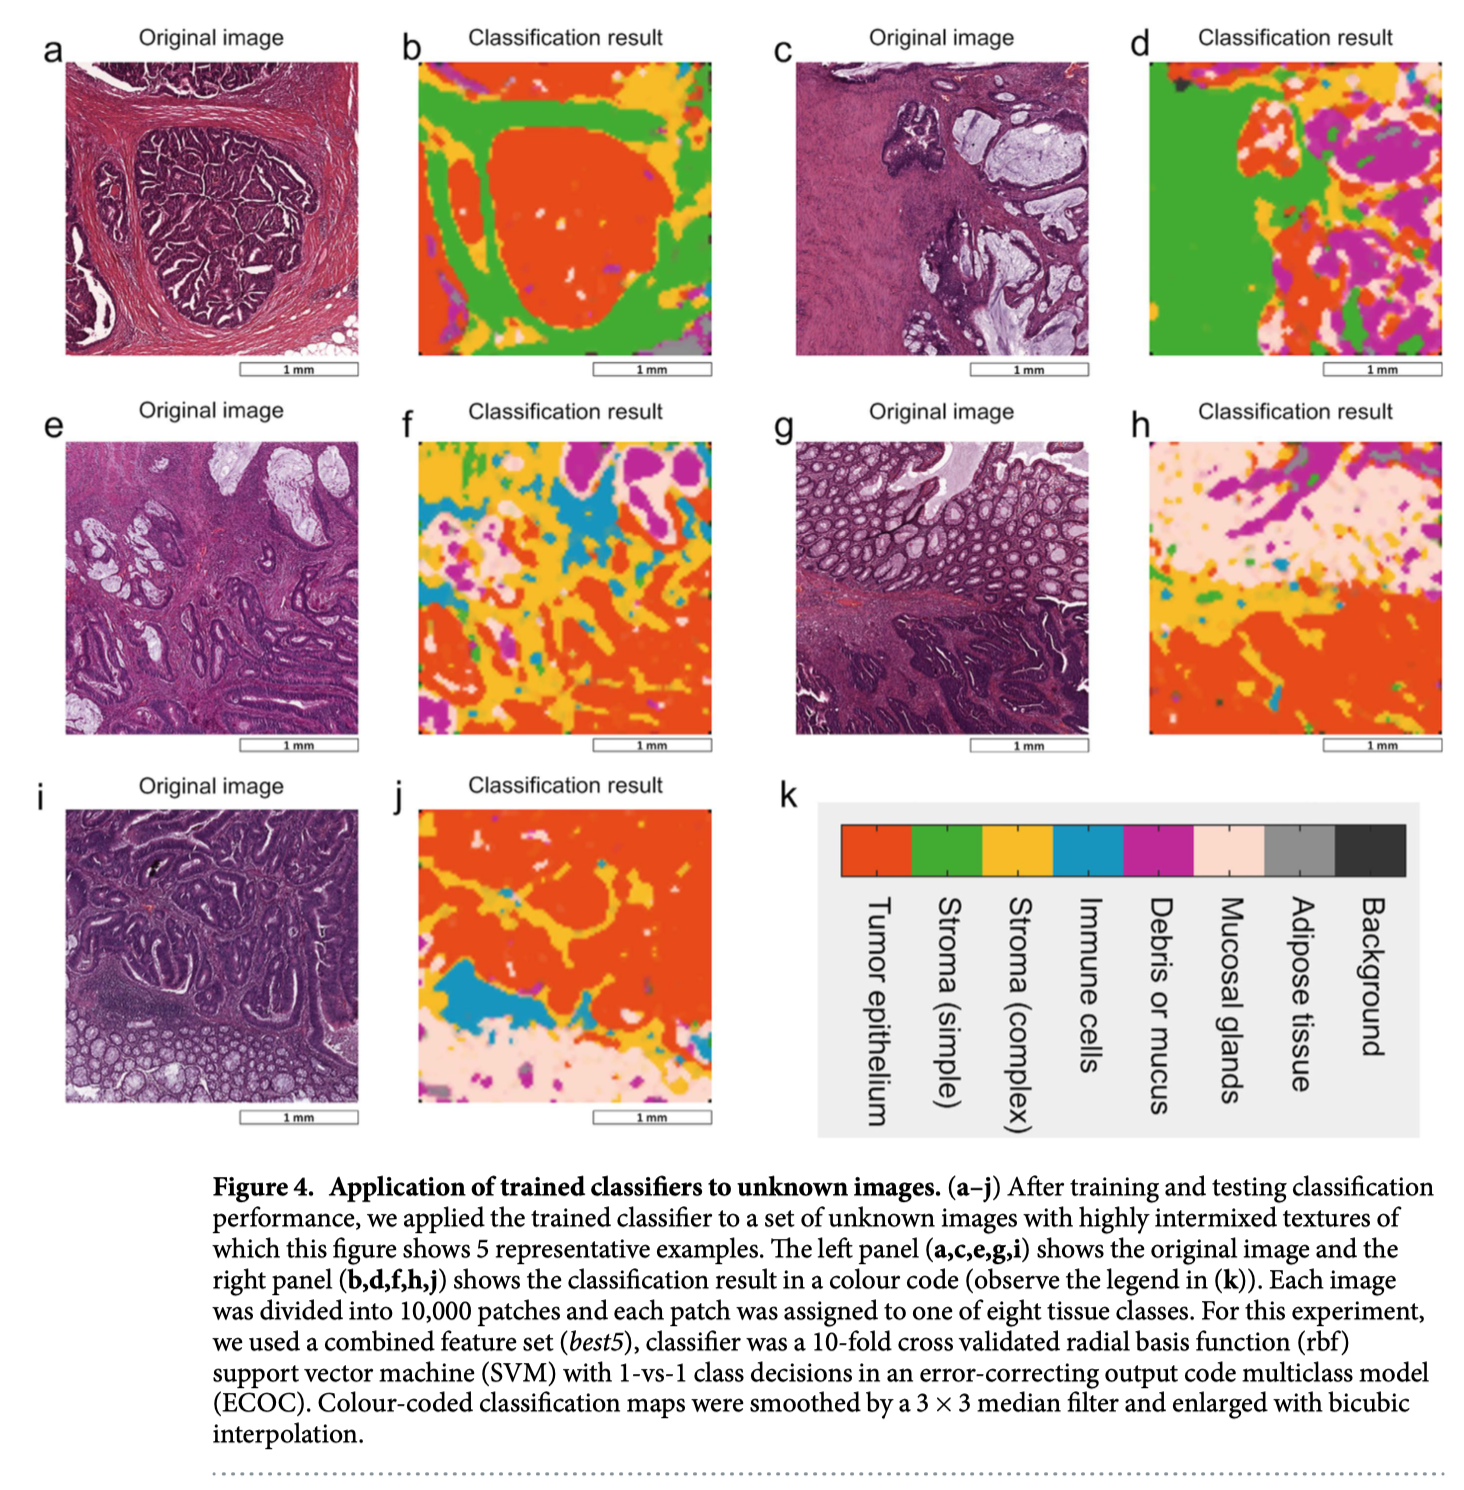

## Critiques

* documentation of model/feature selection was not explicit enough
    * it felt like they "manually" did what sklearn's pipeline/gridsearch performs explicitly
* Too many features selected from
    * "higher moments" went way too high
        * I'd need a very good 
    * in their defense, many of the features were already applied in the literature
* CIs for CV model performance not provided, so difficult to interpret the statistical significance of the results comparing some of the models